## Figure 6-(a),7. Phase portrait near non-singular fixed points (near $\left(0, 0\right)$)
- parameters : $\epsilon=4$, $\lambda=4$, $\alpha = 0.1, \beta = 0.01, \delta = 0.02, \gamma=0.1$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from PIL import Image
import math
import warnings
import random
from scipy.integrate import ode

In [2]:
plt.rcParams["figure.figsize"] = (6,5)

In [3]:
np.seterr(divide='ignore', invalid='ignore') # avoiding invalid value encountered in true_divide
# warnings.filterwarnings(action='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
alpha = 0.1; beta = 0.01; 
delta = 0.02; gam = 0.1;
eps = 4; lamda = 4;

In [5]:
A = alpha*gam*(eps*delta - beta*lamda)
B = (alpha**2)*(gam**2)*(eps*delta - beta*lamda)**2 - 4*alpha*gam*beta*delta*(beta*delta - alpha*eps*gam*lamda) 
print(A, '\n', B)
print(A+np.sqrt(B), '\n', A-np.sqrt(B))

0.0004000000000000001 
 1.4384000000000005e-06
0.0015993331480451964 
 -0.0007993331480451962


In [6]:
# fixed point (we use third one)
ini2 = [(beta+(eps*gam))/(eps*(delta+(alpha*lamda))), ((alpha*lamda)+delta)/(lamda*(beta+(eps*gam)))]
ini3 = [gam/delta, alpha/beta]

print(ini2)
print(ini3)

[0.24404761904761904, 0.25609756097560976]
[5.0, 10.0]


In [7]:
# test
print(alpha - beta*ini2[1] + eps*delta*ini2[0]*ini2[1] - eps*gam*ini2[1])
print(delta*ini2[0] - gam + alpha*lamda*ini2[0] - beta*lamda*ini2[0]*ini2[1])

print(alpha - beta*ini3[1] + eps*delta*ini3[0]*ini3[1] - eps*gam*ini3[1])
print(delta*ini3[0] - gam + alpha*lamda*ini3[0] - beta*lamda*ini3[0]*ini3[1])

0.0
-1.1709383462843448e-17
0.0
0.0


In [8]:
def modified_lotka(y, t=0):

    alpha = 0.1; beta = 0.01; 
    delta = 0.02; gam = 0.1;
    eps = 4; lamda = 4;
    return ([(alpha*y[0] - beta*y[0]*y[1] + eps*delta*(y[0]**2)*y[1] - eps*gam*y[0]*y[1])/(1-eps*lamda*y[0]*y[1]),
            (delta*y[0]*y[1] - gam*y[1] + alpha*lamda*y[0]*y[1] - beta*lamda*y[0]*(y[1]**2))/(1-eps*lamda*y[0]*y[1])])

In [9]:
# Open figure
f = plt.figure()
t = np.linspace(0, 1000,100)

<Figure size 432x360 with 0 Axes>

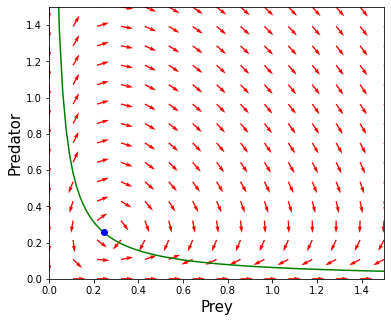

In [14]:
nb_points = 15

x = np.linspace(0, 1.5, nb_points)
y = np.linspace(0, 1.5, nb_points)
xx = np.linspace(0, 1.5, 100)

X1 , Y1 = np.meshgrid(x,y)
DX1, DY1 = modified_lotka([X1, Y1])  # compute growth rate on the gridt

cur1 = (1/(eps*lamda))*(1/xx)

# Direction at each grid point is the hypotenuse of the prey direction and the predator direction.

M = (np.hypot(DX1, DY1)) # Norm of the growth rate 
M[M == 0] = 1  # Avoid zero division errors 

# Normalize the length of each arrow (optional)  ## fig 7
DX1 /= M
DY1 /= M

"""
This is using the quiver function to plot the field of arrows using DX1 and
DY1 for direction and M for speed
"""
plt.quiver(X1, Y1, DX1, DY1, color='red')
plt.plot(xx, cur1, color = 'green')
plt.plot(ini2[0],ini2[1], 'bo')

plt.xlim([0,1.5])
plt.ylim([0,1.5])

plt.xlabel("Prey", fontsize = 15)
plt.ylabel("Predator", fontsize = 15)
plt.savefig('re_image/fig6-1.eps', format='eps')
# plt.savefig('re_image/fig7.eps', format='eps')
plt.show()